In [1]:
!pip install mlxtend
!pip install scikit-plot

In [2]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv 
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
import scikitplot as skplt
from imblearn.combine import SMOTETomek

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
new_columns = ['Age_m','assess_m','cancer_m','comp_m','density_m','famaly_m','hrt_m', 'prvmam_m','biophx_m','mammtype','CaType_m','bmi_m','ptid_m']

In [4]:
# read in data from csv
df = pd.read_csv("data.csv",header=None,names=new_columns)
# handling missing data "?" with NaN
df = df.iloc[1:]

In [5]:
df.head()

,Age_m,assess_m,cancer_m,comp_m,density_m,famaly_m,hrt_m,prvmam_m,biophx_m,mammtype,CaType_m,bmi_m,ptid_m
1,62,1,0,1,2,0,0,1,0,1,8,24.0235443,1
2,65,1,0,1,4,0,0,1,0,1,8,-99,2
3,69,0,0,1,2,0,0,1,0,1,8,29.0524292,3
4,64,2,0,1,2,0,0,1,0,1,8,-99,4
5,63,3,0,1,2,0,0,1,1,1,8,33.7295227,5


In [6]:
# la variable bmi_m cuand este NAN, su nuevo valor será la media
df['bmi_m'] = df['bmi_m'].replace(['-99'],'NaN')
df['bmi_m'] = df['bmi_m'].astype(float)
df['bmi_m'].fillna(value=df['bmi_m'].mean(), inplace=True)

df.head()

,Age_m,assess_m,cancer_m,comp_m,density_m,famaly_m,hrt_m,prvmam_m,biophx_m,mammtype,CaType_m,bmi_m,ptid_m
1,62,1,0,1,2,0,0,1,0,1,8,24.023544,1
2,65,1,0,1,4,0,0,1,0,1,8,26.865503,2
3,69,0,0,1,2,0,0,1,0,1,8,29.052429,3
4,64,2,0,1,2,0,0,1,0,1,8,26.865503,4
5,63,3,0,1,2,0,0,1,1,1,8,33.729523,5


In [ ]:
df.isna().sum()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 1 to 40000
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age_m      40000 non-null  object 
 1   assess_m   40000 non-null  object 
 2   cancer_m   40000 non-null  object 
 3   comp_m     40000 non-null  object 
 4   density_m  40000 non-null  object 
 5   famaly_m   40000 non-null  object 
 6   hrt_m      40000 non-null  object 
 7   prvmam_m   40000 non-null  object 
 8   biophx_m   40000 non-null  object 
 9   mammtype   40000 non-null  object 
 10  CaType_m   40000 non-null  object 
 11  bmi_m      40000 non-null  float64
 12  ptid_m     40000 non-null  object 
dtypes: float64(1), object(12)
memory usage: 4.0+ MB


In [7]:
#Ducplicados
df[df.duplicated(['ptid_m'])]

,Age_m,assess_m,cancer_m,comp_m,density_m,famaly_m,hrt_m,prvmam_m,biophx_m,mammtype,CaType_m,bmi_m,ptid_m
18,62,2,0,1,3,0,0,1,0,1,8,26.865503,17
25,67,1,0,1,3,0,0,1,1,1,8,33.836548,23
39,79,1,0,1,2,0,0,1,1,1,8,26.865503,36
41,70,2,0,1,2,0,1,1,0,1,8,26.865503,37
44,80,1,0,1,4,0,0,1,0,1,8,34.176941,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39958,63,2,0,1,2,0,0,1,1,2,8,26.865503,36676
39962,71,2,0,1,2,0,0,1,0,1,8,26.865503,36679
39979,60,2,0,1,3,0,0,1,1,1,8,26.865503,36695
39985,79,2,0,1,3,0,0,1,0,1,8,26.865503,36700


In [8]:
#remove duplicate
df.drop_duplicates('ptid_m', inplace = True)

In [9]:
df[df.duplicated(['ptid_m'])]

,Age_m,assess_m,cancer_m,comp_m,density_m,famaly_m,hrt_m,prvmam_m,biophx_m,mammtype,CaType_m,bmi_m,ptid_m


Descripción del dataset

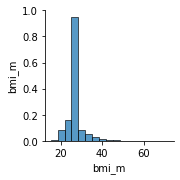

In [11]:
sns.pairplot(df)

In [10]:
df['cancer_m'].value_counts()

0    36468
1      246
Name: cancer_m, dtype: int64

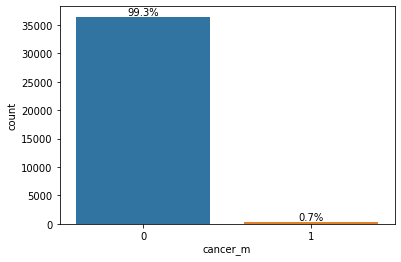

In [11]:
#Plotting the count of the target

ncount = len(df['cancer_m'])
ax = sns.countplot(x=df['cancer_m'])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

In [14]:
# Create a Countplot function
def col_count(col):
    plt.figure(figsize=(14,6))
    sns.countplot(y=col, data=df.sort_values(col)).set_title('Count of {}'.format(col))

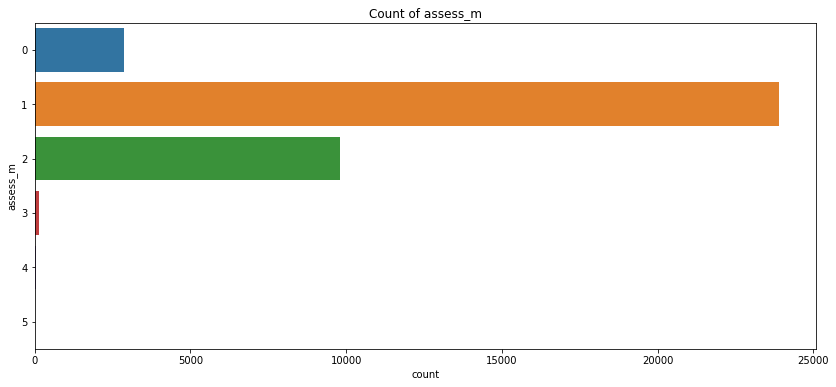

In [15]:
# Distrución del indicador de la	Evaluación del Radiólogo basado en la escala BI-RADS
col_count('assess_m')

In [ ]:
# Create a Countplot function
def col_count1(col,titl):
    plt.figure(figsize=(14,6))
    sns.countplot(y=col, data=df1.sort_values(col)).set_title(titl)

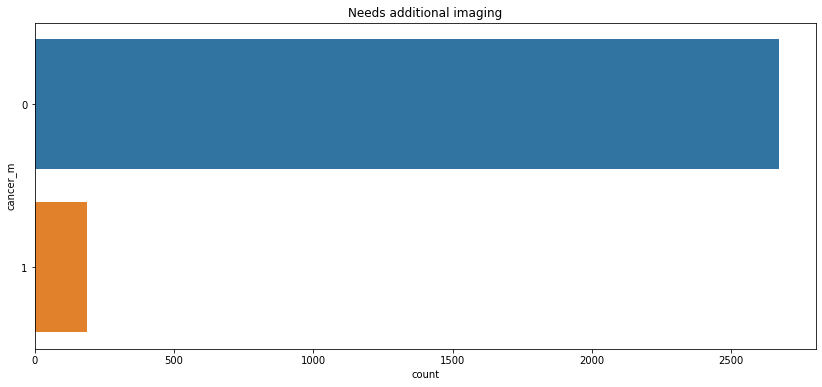

In [ ]:
df1=df[(df.assess_m=='0')]
col_count1('cancer_m',"Needs additional imaging")

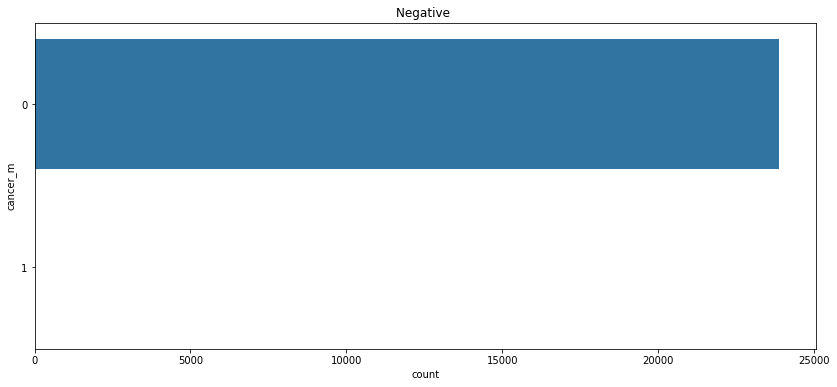

In [ ]:
df1=df[(df.assess_m=='1')]
col_count1('cancer_m',"Negative ")

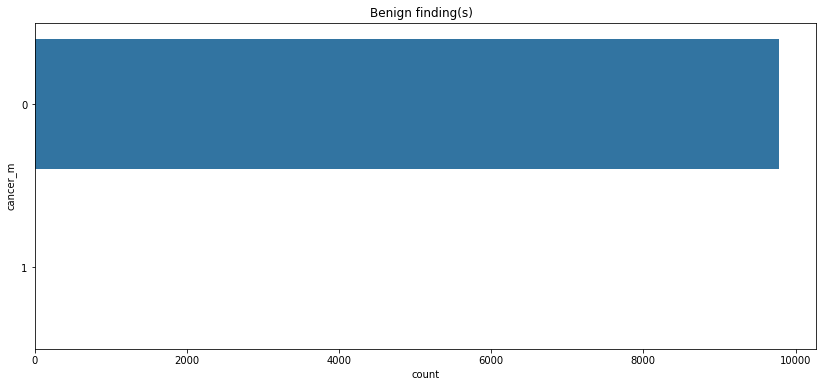

In [ ]:
df1=df[(df.assess_m=='2')]
col_count1('cancer_m',"Benign finding(s)  ")

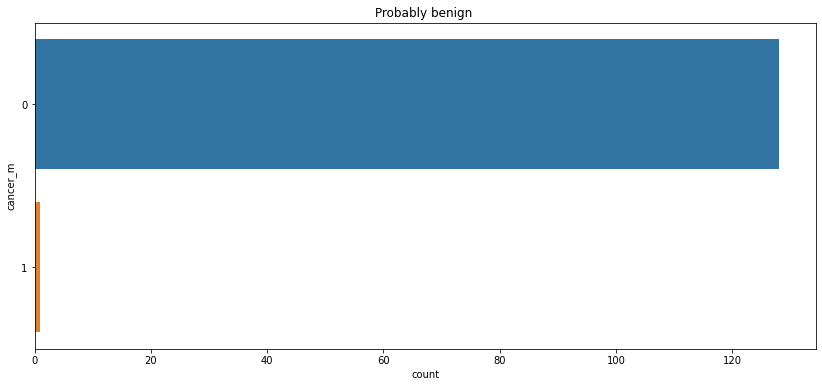

In [ ]:
df1=df[(df.assess_m=='3')]
col_count1('cancer_m',"Probably benign ")

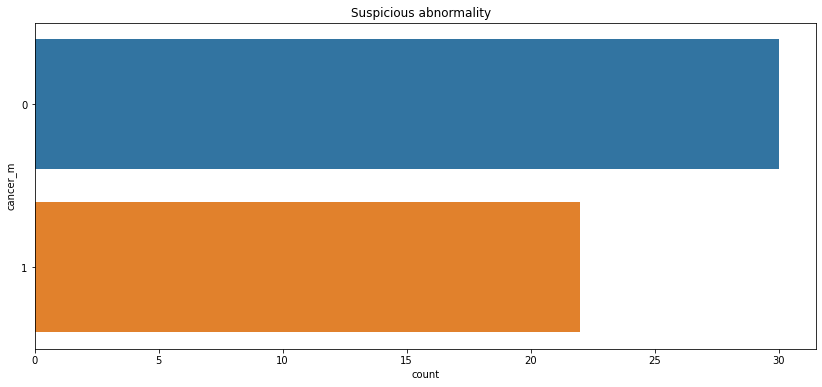

In [ ]:
df1=df[(df.assess_m=='4')]
col_count1('cancer_m',"Suspicious abnormality  ")

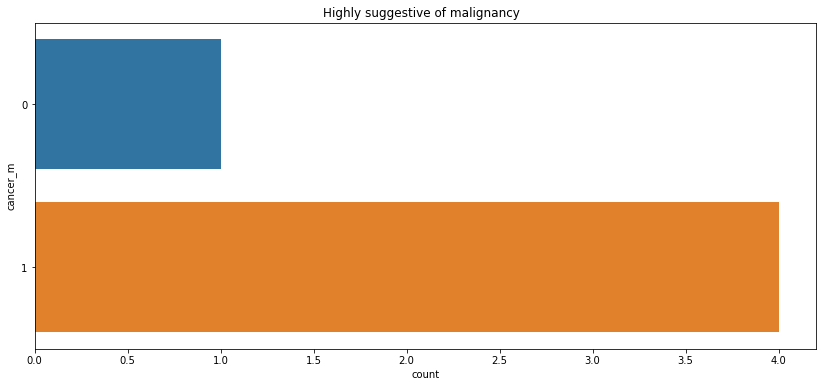

In [ ]:
df1=df[(df.assess_m=='5')]
col_count1('cancer_m',"Highly suggestive of malignancy  ")

In [12]:
# conversion de variables

df['Age_m'] = df['Age_m'].astype(int)
df['assess_m'] = df['assess_m'].astype(int)
df['cancer_m'] = df['cancer_m'].astype(int)
df['comp_m'] = df['comp_m'].astype(int)
df['density_m'] = df['density_m'].astype(int)
df['famaly_m'] = df['famaly_m'].astype(int)
df['hrt_m'] = df['hrt_m'].astype(int)
df['prvmam_m'] = df['prvmam_m'].astype(int)
df['biophx_m'] = df['biophx_m'].astype(int)
df['mammtype'] = df['mammtype'].astype(int)
df['CaType_m'] = df['CaType_m'].astype(int)

In [13]:
# Eliminar la columna que no son necesarias al modelo
df = df.drop(['ptid_m'], axis = 1)
df = df.drop(['comp_m'], axis = 1)
df = df.drop(['CaType_m'], axis = 1)
df = df.drop(['biophx_m'], axis = 1)


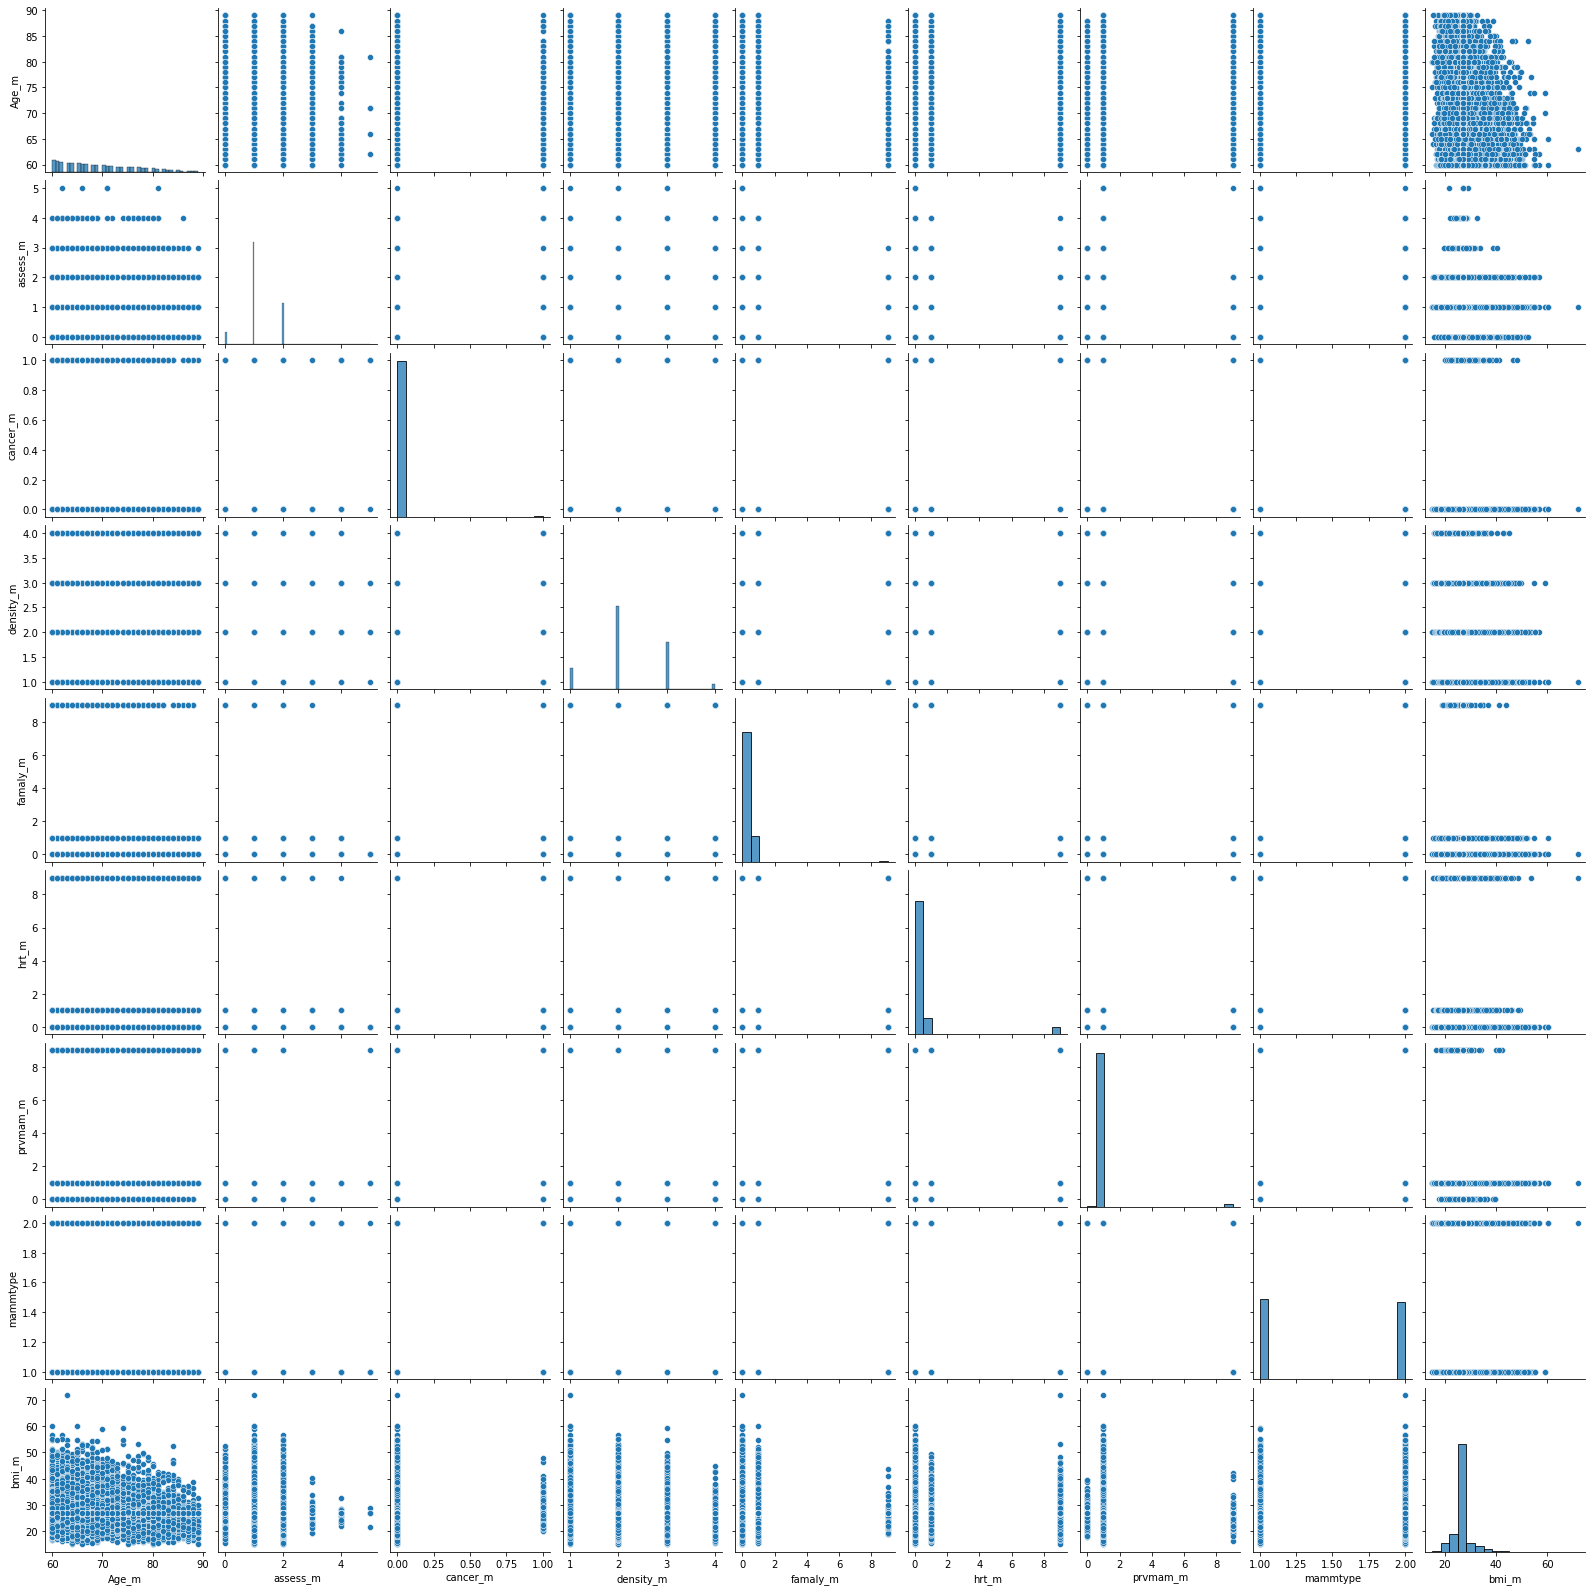

In [18]:
sns.pairplot(df)

In [14]:
df.head(100)

,Age_m,assess_m,cancer_m,density_m,famaly_m,hrt_m,prvmam_m,mammtype,bmi_m
1,62,1,0,2,0,0,1,1,24.023544
2,65,1,0,4,0,0,1,1,26.865503
3,69,0,0,2,0,0,1,1,29.052429
4,64,2,0,2,0,0,1,1,26.865503
5,63,3,0,2,0,0,1,1,33.729523
...,...,...,...,...,...,...,...,...,...
107,61,1,0,3,0,0,1,1,23.959946
108,78,2,0,3,0,0,1,2,22.459137
109,60,1,0,2,0,0,1,2,21.632889
110,67,1,0,2,0,0,1,1,37.122559


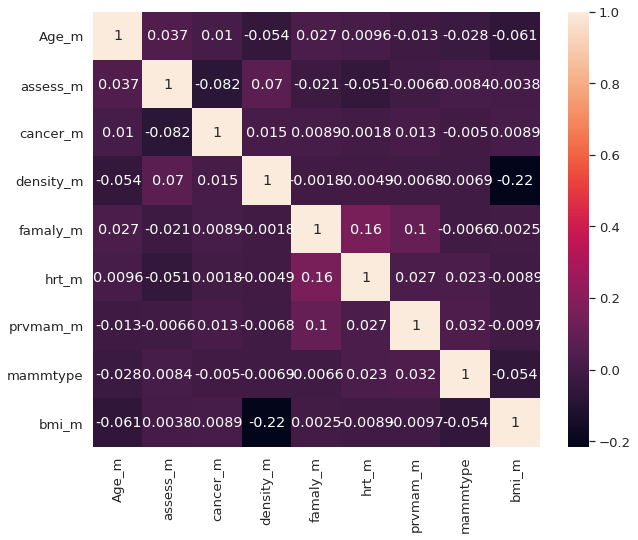

In [20]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['Age_m','assess_m','cancer_m', 'density_m', 'famaly_m', 'hrt_m', 'prvmam_m', 'mammtype', 'bmi_m']].corr(), annot=True)

In [15]:
y = df['cancer_m']
df = df.drop(['cancer_m'], axis = 1)
X = df 

In [16]:
print(X)

       Age_m  assess_m  density_m  ...  prvmam_m  mammtype      bmi_m
1         62         1          2  ...         1         1  24.023544
2         65         1          4  ...         1         1  26.865503
3         69         0          2  ...         1         1  29.052429
4         64         2          2  ...         1         1  26.865503
5         63         3          2  ...         1         1  33.729523
...      ...       ...        ...  ...       ...       ...        ...
39995     66         1          2  ...         1         2  26.865503
39996     80         1          1  ...         1         1  26.865503
39997     78         1          3  ...         1         1  26.865503
39999     66         1          2  ...         1         1  26.865503
40000     61         1          3  ...         1         1  25.544022

[36714 rows x 8 columns]


In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=1,shuffle=True)

In [18]:
# check de la cantidad X_train and X_test

X_train.shape, X_test.shape

((29371, 8), (7343, 8))

### Sin trartar de corregir las clases desbalanceadas

In [ ]:
# Cargamos los algoritmos no conteplamos nada de balanceo
from sklearn.ensemble import GradientBoostingClassifier
models=[]

models.append(('Arboles Decision',DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1))) # Entropy

#models.append(('ID3-Gini Balan',DecisionTreeClassifier(criterion='gini', class_weight= "balanced"))) # Gini
models.append(('Random Forest',RandomForestClassifier(random_state=0))) # Randon Forest
#models.append(('balan',DecisionTreeClassifier(criterion='gini', class_weight= "balanced")))


In [ ]:
# evaluamos cada modelo por turnos 
results=[]
names=[]
listam=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=None)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    listam.append(cv_results.mean())
    print('%s:%f(%f)'%(name,cv_results.mean(),cv_results.std()))

Arboles Decision:0.992612(0.000506)
Random Forest:0.991692(0.000953)


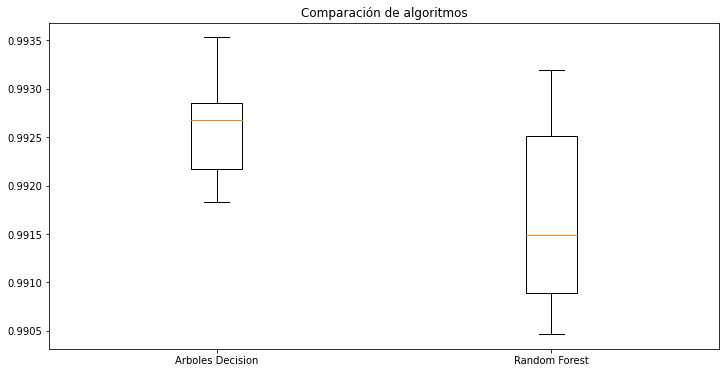

In [ ]:
# Comparación de algoritmos 
plt.figure(figsize=(12,6))
plt.boxplot(results,labels=names)
plt.title('Comparación de algoritmos')
plt.show()

In [ ]:
# Proceso
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)
#model = RandomForestClassifier(random_state=0)
#model = DecisionTreeClassifier(criterion='gini', class_weight= "balanced")
# fit the model
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
y_pred_model = model.predict(X_test)

In [ ]:
print('Puntuación del conjunto de pruebas con DecisionTreeClassifier Gini: {:.4f}'.format(model.score(X_test, Y_test)))

Puntuación del conjunto de pruebas con DecisionTreeClassifier Gini: 0.9939


# Tratar de corregir las clases para que no esten tan desbalanceadas


In [19]:
#creamos una función que crea el modelo que usaremos cada vez
LABELS= ['Negativo','Positivo']
from sklearn.linear_model import LogisticRegression
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base


#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

In [20]:
###  Estrategia: Combinamos resampling con Smote-Tomek
# https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/
from collections import Counter
from sklearn.metrics import confusion_matrix

os_us = SMOTETomek(ratio=0.5)
X_train_res, y_train_res = os_us.fit_sample(X_train, Y_train)

XX = X_train_res
yy = y_train_res

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Distribution before resampling Counter({0: 29168, 1: 203})
Distribution after resampling Counter({0: 29160, 1: 14576})


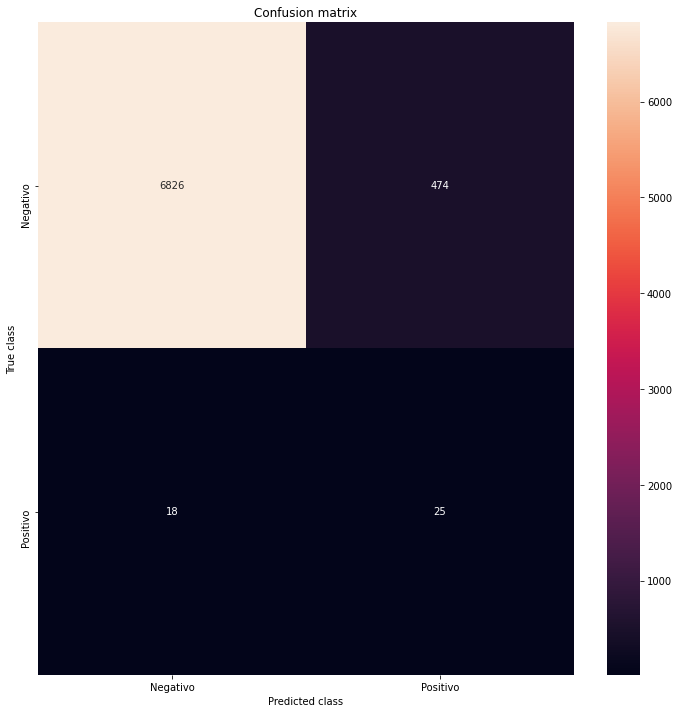

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      7300
           1       0.05      0.58      0.09        43

    accuracy                           0.93      7343
   macro avg       0.52      0.76      0.53      7343
weighted avg       0.99      0.93      0.96      7343

Confusion matrix

 [[6826  474]
 [  18   25]]


In [21]:

print ("Distribution before resampling {}".format(Counter(Y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, Y_test)
pred_y = model.predict(X_test)
mostrar_resultados(Y_test, pred_y)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, pred_y)

print('Confusion matrix\n\n', cm)

In [37]:
print ("Distribution before resampling {}".format(Counter(Y_test)))

Distribution before resampling Counter({0: 7300, 1: 43})


#### Baggin
Es un algoritmo que ajusta múltiples modelos en diferentes subconjuntos de un conjunto de datos de entrenamiento, y luego combina las predicciones de todos los modelos.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24

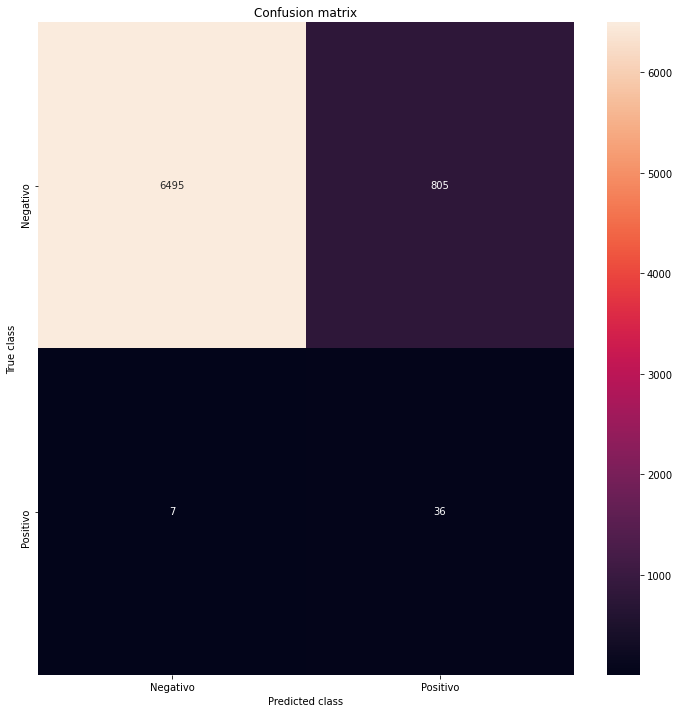

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      7300
           1       0.04      0.84      0.08        43

    accuracy                           0.89      7343
   macro avg       0.52      0.86      0.51      7343
weighted avg       0.99      0.89      0.94      7343



In [76]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

#Train the classifier.
bbc.fit(X_train, Y_train)
#bbc.fit(X_train_res, y_train_res)
pred_y = bbc.predict(X_test)
mostrar_resultados(Y_test, pred_y)

## Deep Learning

In [22]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense        # importing Dense layers
import tensorflow as tf

In [23]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('X_train_res: ',X_train_res.shape)
print('X_test: ',X_test.shape)
print('Y_train: ',Y_train.shape)
print('Y_test: ',Y_test.shape)

X_train:  (29371, 8)
X_train_res:  (43736, 8)
X_test:  (7343, 8)
Y_train:  (29371,)
Y_test:  (7343,)


In [69]:
def build_model():
    model=tf.keras.Sequential([
                            keras.layers.Dense(300,activation='relu' , input_shape=(8,)),
                            keras.layers.Dropout(0.5),
                            keras.layers.Dense(200, activation='relu'),
                            # second hidden layer
                            keras.layers.Dropout(0.3),
                            keras.layers.Dense(100, activation='relu'),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(2, activation='softmax')])
    optimizer=keras.optimizers.Adam(0.01)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [70]:
model=build_model()

In [71]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=10, validation_data=(X_test, Y_test))
#history = model.fit(XX, yy,  epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
294/294 [==============================] - 2s 5ms/step - loss: 0.0983 - accuracy: 0.9920 - val_loss: 0.0371 - val_accuracy: 0.9941
Epoch 2/10
294/294 [==============================] - 1s 4ms/step - loss: 0.0518 - accuracy: 0.9931 - val_loss: 0.0385 - val_accuracy: 0.9941
Epoch 3/10
294/294 [==============================] - 1s 4ms/step - loss: 0.0514 - accuracy: 0.9927 - val_loss: 0.0413 - val_accuracy: 0.9941
Epoch 4/10
294/294 [==============================] - 1s 4ms/step - loss: 0.0424 - accuracy: 0.9931 - val_loss: 0.0361 - val_accuracy: 0.9941
Epoch 5/10
294/294 [==============================] - 1s 4ms/step - loss: 0.0415 - accuracy: 0.9931 - val_loss: 0.0362 - val_accuracy: 0.9941
Epoch 6/10
294/294 [==============================] - 1s 4ms/step - loss: 0.0413 - accuracy: 0.9931 - val_loss: 0.0361 - val_accuracy: 0.9941
Epoch 7/10
294/294 [==============================] - 1s 4ms/step - loss: 0.0414 - accuracy: 0.9931 - val_loss: 0.0361 - val_accuracy: 0.9941
Epoch 

In [72]:
# evaluar el modelo
train_ssc = model.evaluate(X_train, Y_train, verbose=0)
test_ssc = model.evaluate(X_test, Y_test, verbose=0)

#train_ssc = model.evaluate(XX, yy, verbose=0)
#test_ssc = model.evaluate(X_test, Y_test, verbose=0)

In [73]:
print('Train: {} Test: {}'.format(train_ssc, test_ssc))

Train: [0.04129423573613167, 0.99308842420578] Test: [0.03613884374499321, 0.994144082069397]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


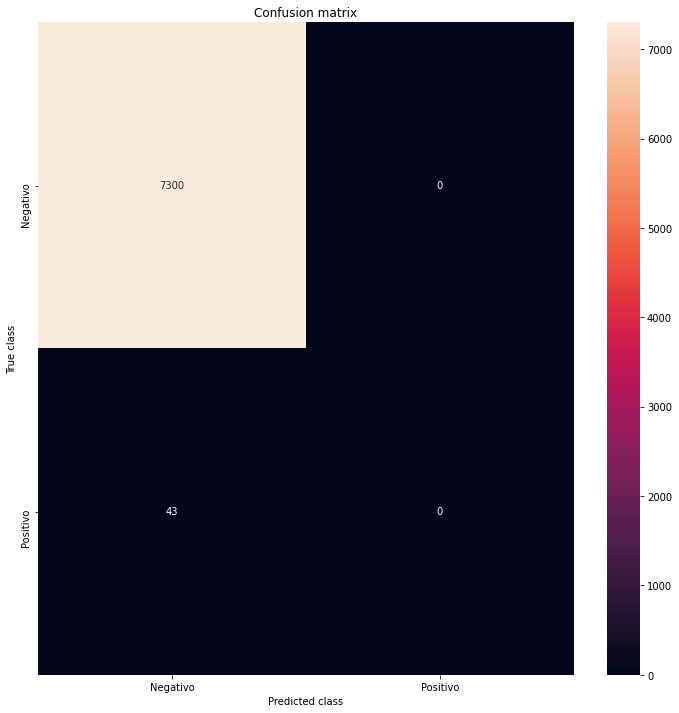

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7300
           1       0.00      0.00      0.00        43

    accuracy                           0.99      7343
   macro avg       0.50      0.50      0.50      7343
weighted avg       0.99      0.99      0.99      7343

Confusion matrix

 [[7300    0]
 [  43    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
pred_classes = model.predict_classes(X_test, verbose=0)

mostrar_resultados(Y_test, pred_classes)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, pred_classes)

print('Confusion matrix\n\n', cm)